In [12]:

from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame


In [3]:
#black scholes formula:
C = N1 *S - N2 *K*e**()

In [5]:
#N(d1) calculation
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

#N(d2) calculation
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

In [6]:
#BS call option
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))

#Bs Put option
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)

Consider again a short position in a European call option on a non-dividend-paying stock with
a maturity of one year and strike price K of e99. Let the one year interest rate be 6% and the
current price of the stock be e100. Furthermore, assume that the volatility is 20%

 Use the Euler method to perform a hedging simulation. Do an experiment where the
volatility in the stock price process is matching the volatility used in the delta computation
(set both equal to 20%). Vary the frequency of the hedge adjustment (from daily to weekly)
and explain the results. Perform numerical experiments where the volatility in the stock
price process is not matching the volatility used in the delta valuation. Experiment for
various levels and explain the results.




In [ ]:
r = 0.06
K = 99


In [15]:

from datetime import datetime, date
import numpy as np
import pandas as pd
import pandas_datareader.data as web

stock = 'SPY'
expiry = '02-27-2022'
strike_price = 370

today = datetime.now()
one_year_ago = today.replace(year=today.year-1)

df = web.DataReader(stock, 'yahoo', one_year_ago, today)

df = df.sort_values(by="Date")
df = df.dropna()
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)

sigma = np.sqrt(252) * df['returns'].std()
uty = (web.DataReader(
    "^TNX", 'yahoo', today.replace(day=today.day-1), today)['Close'].iloc[-1])/100
lcp = df['Close'].iloc[-1]
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365

print('The Option Price is: ', bs_call(lcp, strike_price, t, uty, sigma))

The Option Price is:  57.82009694302536


In [2]:
!pip install matplotlib

In [24]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def bottom_boundary_condition(K,T,S_min, r, t):
    return np.zeros(t.shape)
def top_boundary_condition(K,T,S_max, r, t):
    return S_max-np.exp(-r*(T-t))*K
def bottom_boundary_condition(K,T,S_min, r, t):
    return np.maximum(S-K,0)

In [25]:
bottom_boundary_condition(99,)

TypeError: bottom_boundary_condition() missing 4 required positional arguments: 'T', 'S_min', 'r', and 't'

In [26]:
def compute_abc( K, T, sigma, r, S, dt, dS ):
    a = -sigma**2 * S**2/(2* dS**2 ) + r*S/(2*dS)
    b = r + sigma**2 * S**2/(dS**2)
    c = -sigma**2 * S**2/(2* dS**2 ) - r*S/(2*dS)
    return a,b,c
def compute_lambda( a,b,c ):
    return scipy.sparse.diags( [a[1:],b,c[:-1]],offsets=[-1,0,1])
def compute_W(a,b,c, V0, VM): 
    M = len(b)+1
    W = np.zeros(M-1)
    W[0] = a[0]*V0 
    W[-1] = c[-1]*VM 
    return W

In [27]:
def price_call_explicit( K, T, r, sigma, N, M):
    # Choose the shape of the grid
    dt = T/N
    S_min=0
    S_max=K*np.exp(8*sigma*np.sqrt(T))
    dS = (S_max-S_min)/M
    S = np.linspace(S_min,S_max,M+1)
    t = np.linspace(0,T,N+1)
    V = np.zeros((N+1,M+1)) #...
    
    # Set the boundary conditions
    V[:,-1] = top_boundary_condition(K,T,S_max,r,t)
    V[:,0] = bottom_boundary_condition(K,T,S_max,r,t)
    V[-1,:] = final_boundary_condition(K,T,S) #...
    
    # Apply the recurrence relation
    a,b,c = compute_abc(K,T,sigma,r,S[1:-1],dt,dS)
    Lambda =compute_lambda( a,b,c) 
    identity = scipy.sparse.identity(M-1)
    
    for i in range(N,0,-1):
        W = compute_W(a,b,c,V[i,0],V[i,M])
        # Use `dot` to multiply a vector by a sparse matrix
        V[i-1,1:M] = (identity-Lambda*dt).dot( V[i,1:M] ) - W*dt
        
    return V, t, S

In [28]:
S = 100

In [29]:
price_call_explicit(99,1,6,20,100,100)

NameError: name 'final_boundary_condition' is not defined

In [21]:
# m in N, delta t = T/M
#initialize S0 so that

for i in range (1,100):
    Si = 

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_20868/2615902420.py, line 4)

In [46]:
x0 = 0
y0 = 1
xf = 100
n = 1000
deltax = (xf-x0)/(n-1)

In [47]:
x = np.linspace(x0,xf,n)
y = np.zeros([n])

In [48]:
y[0] = y0
for i in range(1,n):
    y[i]= deltax*(-y[i-1]+np.sin(x[i-1]))+y[i-1]

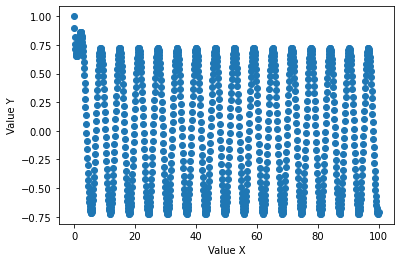

In [49]:
plt.plot(x,y,'o')
plt.xlabel("Value X")
plt.ylabel("Value Y")
plt.show()